In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

In [2]:
np.random.seed(42)

In [3]:
df = pd.read_csv('/content/Language Detection.csv')

In [4]:
df.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10337 non-null  object
 1   Language  10337 non-null  object
dtypes: object(2)
memory usage: 161.6+ KB


In [7]:
df['Language'].unique()
df['Language'].nunique()

17

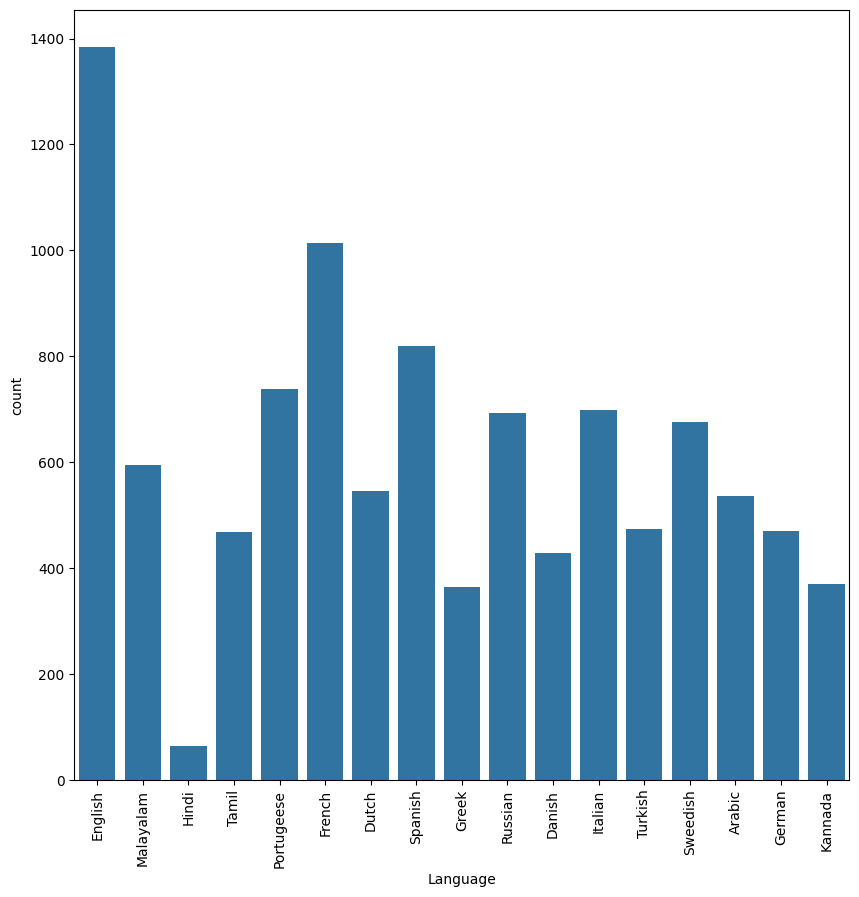

In [8]:
plt.figure(figsize = (10,10))
sns.countplot(data = df , x = 'Language')
plt.xticks(rotation = 90);

In [9]:
df['Language'].value_counts()

,count
Language,
English,1385
French,1014
Spanish,819
Portugeese,739
Italian,698
Russian,692
Sweedish,676
Malayalam,594
Dutch,546


In [10]:
Greek = df[df['Language'] == 'Greek']
English = df[df['Language']=='English']
Portugeese = df[df['Language']=='Portugeese']
French = df[df['Language']=='French']
Dutch = df[df['Language']=='Dutch']
Spanish = df[df['Language']=='Spanish']
Russian = df[df['Language']=='Russian']
Danish = df[df['Language']=='Danish']
Italian = df[df['Language']=='Italian']
Turkish = df[df['Language']=='Turkish']
Sweedish = df[df['Language']=='Sweedish']
German = df[df['Language']=='German']
Arabic = df[df['Language']=='Arabic']
Malayalam = df[df['Language']=='Malayalam']
Kannada = df[df['Language']=='Kannada']
Tamil = df[df['Language']=='Tamil']

In [11]:
from sklearn.utils import resample
english_downsample = resample(English,
                              replace = True,
                              n_samples = len(Greek),
                              random_state = 42)
Portugeese_downsample = resample(Portugeese,
                              replace = True,
                              n_samples = len(Greek),
                              random_state = 42)
French_downsample = resample(French,
                              replace = True,
                              n_samples = len(Greek),
                              random_state = 42)
Dutch_downsample = resample(Dutch,
                              replace = True,
                              n_samples = len(Greek),
                              random_state = 42)
Spanish_downsample = resample(Spanish,
                              replace = True,
                              n_samples = len(Greek),
                              random_state = 42)
Russian_downsample = resample(Russian,
                              replace = True,
                              n_samples = len(Greek),
                              random_state = 42)
Danish_downsample = resample(Danish,
                              replace = True,
                              n_samples = len(Greek),
                              random_state = 42)
Italian_downsample = resample(Italian,
                              replace = True,
                              n_samples = len(Greek),
                              random_state = 42)
Turkish_downsample = resample(Turkish,
                              replace = True,
                              n_samples = len(Greek),
                              random_state = 42)
Sweedish_downsample = resample(Sweedish,
                              replace = True,
                              n_samples = len(Greek),
                              random_state = 42)
German_downsample = resample(German,
                              replace = True,
                              n_samples = len(Greek),
                              random_state = 42)
Arabic_downsample = resample(Arabic,
                              replace = True,
                              n_samples = len(Greek),
                              random_state = 42)
Malayalam_downsample = resample(Malayalam,
                              replace = True,
                              n_samples = len(Greek),
                              random_state = 42)
Kannada_downsample = resample(Kannada,
                              replace = True,
                              n_samples = len(Greek),
                              random_state = 42)
Tamil_downsample = resample(Tamil,
                              replace = True,
                              n_samples = len(Greek),
                              random_state = 42)

In [13]:
new_df = pd.concat([
    english_downsample,
    Portugeese_downsample,
    French_downsample,
    Dutch_downsample,
    Spanish_downsample,
    Russian_downsample,
    Danish_downsample,
    Italian_downsample,
    Turkish_downsample,
    Sweedish_downsample,
    German_downsample,
    Arabic_downsample,
    Malayalam_downsample,
    Kannada_downsample,
    Tamil_downsample,
    Greek
])

In [14]:
new_df.head()

,Text,Language
1126,no worries imagine you came home and there are...,English
860,"Due to its generality, the field is studied in...",English
1294,"unfortunately, i have to say no.",English
1130,if you ask somebody not to be upset not to cry...,English
1095,so if you are just about to embark on your jou...,English


In [15]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5840 entries, 1126 to 5993
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      5840 non-null   object
 1   Language  5840 non-null   object
dtypes: object(2)
memory usage: 136.9+ KB


In [19]:
new_df['Language'].unique()

array(['English', 'Portugeese', 'French', 'Dutch', 'Spanish', 'Russian',
       'Danish', 'Italian', 'Turkish', 'Sweedish', 'German', 'Arabic',
       'Malayalam', 'Kannada', 'Tamil', 'Greek'], dtype=object)

In [18]:
new_df['Language'].nunique()

16

In [17]:
new_df['Language'].value_counts()

,count
Language,
English,365
Portugeese,365
French,365
Dutch,365
Spanish,365
Russian,365
Danish,365
Italian,365
Turkish,365


In [21]:
import re
import string
import time
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = ' '.join(text.split())
    return text


In [23]:
new_df['clean_text'] = new_df['Text'].apply(preprocess_text)

In [24]:
new_df.head()

,Text,Language,clean_text
1126,no worries imagine you came home and there are...,English,no worries imagine you came home and there are...
860,"Due to its generality, the field is studied in...",English,due to its generality the field is studied in ...
1294,"unfortunately, i have to say no.",English,unfortunately i have to say no
1130,if you ask somebody not to be upset not to cry...,English,if you ask somebody not to be upset not to cry...
1095,so if you are just about to embark on your jou...,English,so if you are just about to embark on your jou...


In [29]:
new_df.shape

(5840, 3)

In [30]:
X = new_df['clean_text']
y = new_df['Language']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [32]:
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

Training samples: 4672
Testing samples: 1168


In [33]:
print(f"\nLanguage distribution in training set:")
print(y_train.value_counts())
print(f"\nLanguage distribution in testing set:")
print(y_test.value_counts())


Language distribution in training set:
Language
French        292
Italian       292
Arabic        292
Sweedish      292
Turkish       292
English       292
Spanish       292
Dutch         292
Tamil         292
Russian       292
German        292
Portugeese    292
Malayalam     292
Kannada       292
Danish        292
Greek         292
Name: count, dtype: int64

Language distribution in testing set:
Language
German        73
Tamil         73
Danish        73
Arabic        73
Dutch         73
Spanish       73
Italian       73
Malayalam     73
Kannada       73
French        73
English       73
Turkish       73
Sweedish      73
Greek         73
Portugeese    73
Russian       73
Name: count, dtype: int64


In [35]:
tfidf_vectorizer = TfidfVectorizer(
    analyzer='char',
    ngram_range=(1, 3),
    max_features=10000,
    lowercase=True,
    strip_accents='unicode',
    stop_words=None,
    min_df=2,
    max_df=0.95
)
print("\nTF-IDF Vectorization Configuration:")
print("- Analyzer: Char")
print("- N-gram range: (1, 3)")
print("- Max features: 10000")
print("- Min df: 2")
print("- Max df: 0.95")


TF-IDF Vectorization Configuration:
- Analyzer: Char
- N-gram range: (1, 3)
- Max features: 10000
- Min df: 2
- Max df: 0.95


In [36]:
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print(f"\nTF-IDF Matrix shape: {X_train_tfidf.shape}")
print(f"Vocabulary size: {len(tfidf_vectorizer.vocabulary_)}")


TF-IDF Matrix shape: (4672, 10000)
Vocabulary size: 10000


In [38]:

models = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'SVM': SVC(random_state=42, probability=True),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100)
}


results = {}
best_model = None
best_score = 0

print("\nModel Training and Evaluation:")
print("=" * 40)

for name, model in models.items():
    print(f"\nTraining {name}...")

    # Train
    model.fit(X_train_tfidf, y_train)

    # Make predictions
    y_pred = model.predict(X_test_tfidf)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

    print(f"{name} Accuracy: {accuracy:.4f}")

    # Cross-validation
    cv_scores = cross_val_score(model, X_train_tfidf, y_train, cv=5)
    print(f"{name} CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

    # Keep track of best model
    if accuracy > best_score:
        best_score = accuracy
        best_model = (name, model)

print(f"\nBest Model: {best_model[0]} with accuracy: {best_score:.4f}")



Model Training and Evaluation:

Training Naive Bayes...
Naive Bayes Accuracy: 0.9769
Naive Bayes CV Score: 0.9812 (+/- 0.0084)

Training Logistic Regression...
Logistic Regression Accuracy: 0.9803
Logistic Regression CV Score: 0.9797 (+/- 0.0089)

Training SVM...
SVM Accuracy: 0.9897
SVM CV Score: 0.9835 (+/- 0.0069)

Training Random Forest...
Random Forest Accuracy: 0.9743
Random Forest CV Score: 0.9713 (+/- 0.0063)

Best Model: SVM with accuracy: 0.9897



Detailed Evaluation - SVM:

Classification Report:
              precision    recall  f1-score   support

      Arabic       1.00      1.00      1.00        73
      Danish       0.96      0.99      0.97        73
       Dutch       1.00      0.96      0.98        73
     English       0.97      1.00      0.99        73
      French       1.00      1.00      1.00        73
      German       1.00      1.00      1.00        73
       Greek       1.00      1.00      1.00        73
     Italian       0.99      0.97      0.98        73
     Kannada       1.00      1.00      1.00        73
   Malayalam       1.00      1.00      1.00        73
  Portugeese       0.97      1.00      0.99        73
     Russian       1.00      1.00      1.00        73
     Spanish       0.96      0.96      0.96        73
    Sweedish       0.99      0.96      0.97        73
       Tamil       1.00      1.00      1.00        73
     Turkish       1.00      1.00      1.00        73

    accuracy                

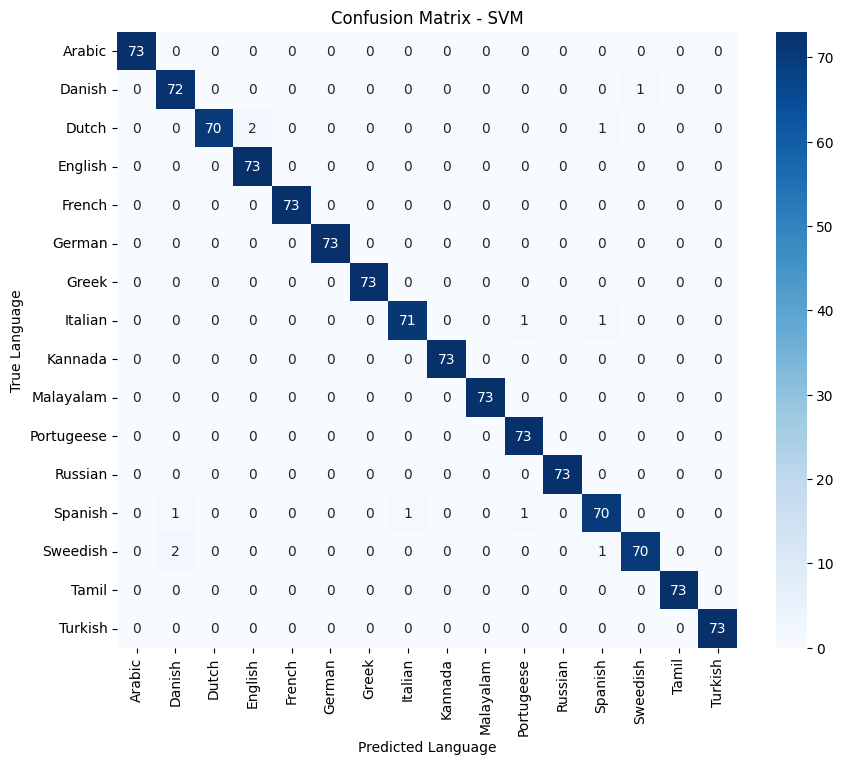

In [39]:
print(f"\nDetailed Evaluation - {best_model[0]}:")
print("=" * 40)

best_predictions = best_model[1].predict(X_test_tfidf)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, best_predictions))

# Confusion Matrix
cm = confusion_matrix(y_test, best_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=best_model[1].classes_,
            yticklabels=best_model[1].classes_)
plt.title(f'Confusion Matrix - {best_model[0]}')
plt.xlabel('Predicted Language')
plt.ylabel('True Language')
plt.show()

In [42]:
print(f"\nHyperparameter Tuning for {best_model[0]}:")
print("=" * 40)

if best_model[0] == 'Naive Bayes':
    param_grid = {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0]}
elif best_model[0] == 'Logistic Regression':
    param_grid = {'C': [0.1, 1, 10, 100]}
elif best_model[0] == 'SVM':
    param_grid = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']}
else:
    param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [10, 20, None]}

grid_search = GridSearchCV(
    best_model[1], param_grid, cv=5, scoring='accuracy', n_jobs=-1
)
grid_search.fit(X_train_tfidf, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")


Hyperparameter Tuning for SVM:
Best parameters: {'C': 10, 'gamma': 'scale'}
Best cross-validation score: 0.9839


In [43]:
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(X_test_tfidf)
final_accuracy = accuracy_score(y_test, final_predictions)

print(f"Final optimized model accuracy: {final_accuracy:.4f}")

Final optimized model accuracy: 0.9914


In [44]:
final_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('classifier', final_model)
])
final_pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(analyzer='char', max_df=0.95,
                                 max_features=10000, min_df=2,
                                 ngram_range=(1, 3), strip_accents='unicode')),
                ('classifier', SVC(C=10, probability=True, random_state=42))])

In [45]:
def detect_language(text, model_pipeline=final_pipeline):
    """
    Detect the language of input text

    Args:
        text (str): Input text to analyze
        model_pipeline: Trained pipeline model
    Returns:
        tuple: (predicted_language, confidence_score)
    """
    predicted_language = model_pipeline.predict([text])[0]
    probabilities = model_pipeline.predict_proba([text])[0]
    confidence = max(probabilities)
    return predicted_language, confidence


In [55]:
test_texts = [
    "Amidst the labyrinthine complexities of quantum mechanics, serendipity often unveils profound discoveries.",
    "Num torvelinho de aspirações utópicas, a resiliência forja destinos inauditos.",
    "In de wirwar van filosofische bespiegelingen openbaart de intuïtie onverwachte inzichten.",
    "В вихре метафизических размышлений прозорливость освещает путь к истине.",
    "خضم الجدل الفلسفي، تتجلى البصيرة كنور يهدي إلى الحقيقة"
]

In [56]:
for text in test_texts:
    lang, conf = detect_language(text)
    print(f"Text: '{text}'")
    print(f"Detected Language: {lang} (Confidence: {conf:.4f})")
    print("-" * 30)

Text: 'Amidst the labyrinthine complexities of quantum mechanics, serendipity often unveils profound discoveries.'
Detected Language: English (Confidence: 0.9478)
------------------------------
Text: 'Num torvelinho de aspirações utópicas, a resiliência forja destinos inauditos.'
Detected Language: Portugeese (Confidence: 0.9107)
------------------------------
Text: 'In de wirwar van filosofische bespiegelingen openbaart de intuïtie onverwachte inzichten.'
Detected Language: Dutch (Confidence: 0.5164)
------------------------------
Text: 'В вихре метафизических размышлений прозорливость освещает путь к истине.'
Detected Language: Russian (Confidence: 0.9900)
------------------------------
Text: 'خضم الجدل الفلسفي، تتجلى البصيرة كنور يهدي إلى الحقيقة'
Detected Language: Arabic (Confidence: 0.9741)
------------------------------


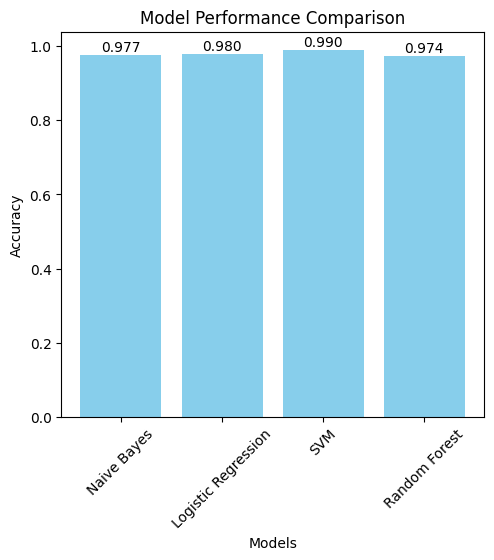

In [49]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
models_list = list(results.keys())
scores_list = list(results.values())
bars = plt.bar(models_list, scores_list, color='skyblue')
plt.title('Model Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
for bar, score in zip(bars, scores_list):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001,
             f'{score:.3f}', ha='center', va='bottom')

In [57]:
import joblib
joblib.dump(final_pipeline, 'language_detector_model.pkl')
print("\nModel saved as 'language_detector_model.pkl'")

# Instructions for loading the model later
print("\nTo load the model later, use:")
print("loaded_model = joblib.load('language_detector_model.pkl')")
print("prediction = loaded_model.predict(['your text here'])")


Model saved as 'language_detector_model.pkl'

To load the model later, use:
loaded_model = joblib.load('language_detector_model.pkl')
prediction = loaded_model.predict(['your text here'])
